In [1]:
# Dependencies
import pandas as pd
import sqlite3

In [8]:
# Create connections to database
conn = sqlite3.connect("Data/Hotels.db")

#Load the database table into a pandas dataframe
popndf = pd.read_sql_query("select m.name, m.province, r.reviews_rating from metadata as m join ratings as r on m.name = r.Name;", conn)
conn.close()

# Preview the dataframe
popndf.head()

,name,province,reviews_rating
0,Rancho Valencia Resort Spa,CA,5.0
1,Rancho Valencia Resort Spa,CA,5.0
2,Rancho Valencia Resort Spa,CA,5.0
3,Aloft Arundel Mills,MD,2.0
4,Aloft Arundel Mills,MD,5.0


In [18]:
# Create a dictionary of state names and their abbreviations
state_abbr = sorted(list(set(popndf["province"])))
state_name = ["Alaska", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "Delaware", "Florida",
              "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky",
              "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri",
              "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire",
              "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", 
              "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
              "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]

state_dict = dict(zip(state_abbr, state_name))
# Add a column containing state names
popndf["State"] = popndf["province"].map(state_dict)
popndf.head()

,name,province,reviews_rating,State
0,Rancho Valencia Resort Spa,CA,5.0,California
1,Rancho Valencia Resort Spa,CA,5.0,California
2,Rancho Valencia Resort Spa,CA,5.0,California
3,Aloft Arundel Mills,MD,2.0,Maryland
4,Aloft Arundel Mills,MD,5.0,Maryland


In [9]:
# Load the csv file in a dataframe
path = "Data/State_population_data.csv"

df = pd.read_csv(path)
df.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2018,POPEST18PLUS2018,PCNT_POPEST18PLUS
0,10,0,0,0,United States,327167434,253768092,77.6
1,40,3,6,1,Alabama,4887871,3798031,77.7
2,40,4,9,2,Alaska,737438,553622,75.1
3,40,4,8,4,Arizona,7171646,5528989,77.1
4,40,3,7,5,Arkansas,3013825,2310645,76.7


In [13]:
# Selecting only the columns that will be used in the analysis
df1 = df[['NAME','POPEST18PLUS2018']]

# Preview the dataframe
df1.head()

,NAME,POPEST18PLUS2018
0,United States,253768092
1,Alabama,3798031
2,Alaska,553622
3,Arizona,5528989
4,Arkansas,2310645


In [19]:
# Renaming the column name
df2 = df1[['NAME','POPEST18PLUS2018']]
df2.columns = ['State', 'Popn']
df2.head()

,State,Popn
0,United States,253768092
1,Alabama,3798031
2,Alaska,553622
3,Arizona,5528989
4,Arkansas,2310645


In [21]:
# merging common columns
df_merge_col = pd.merge(popndf, df2)

df_merge_col

,name,province,reviews_rating,State,Popn
0,Rancho Valencia Resort Spa,CA,5.00,California,30567090
1,Rancho Valencia Resort Spa,CA,5.00,California,30567090
2,Rancho Valencia Resort Spa,CA,5.00,California,30567090
3,Hotel Zelos,CA,3.00,California,30567090
4,Hotel Zelos,CA,4.00,California,30567090
5,Hotel Zelos,CA,5.00,California,30567090
6,Hotel Zelos,CA,5.00,California,30567090
7,Fairmont Grand Del Mar,CA,4.00,California,30567090
8,Fairmont Grand Del Mar,CA,4.00,California,30567090
9,Fairmont Grand Del Mar,CA,5.00,California,30567090


In [37]:
# grouping by population and State
review_count = df_merge_col.groupby(['Popn', 'State'],as_index=False).count()
review_count.head()

,Popn,State,name,province,reviews_rating
0,442962,Wyoming,114,114,114
1,510326,Vermont,14,14,14
2,553622,Alaska,21,21,21
3,581379,North Dakota,18,18,18
4,664629,South Dakota,121,121,121


In [40]:
# Groupby Avg reviews_ratings per state
Avg_review_state = df_merge_col.groupby('State',as_index=False)['reviews_rating'].mean()
Avg_review_state.head()

,State,reviews_rating
0,Alaska,3.333333
1,Arizona,3.833333
2,Arkansas,3.241611
3,California,3.943031
4,Colorado,4.057143


In [28]:
%matplotlib notebook

In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
g1 = df_merge_col.groupby("State", as_index=False).count()
g1.head()

,State,name,province,reviews_rating,Popn
0,Alaska,21,21,21,21
1,Arizona,324,324,324,324
2,Arkansas,149,149,149,149
3,California,1270,1270,1270,1270
4,Colorado,210,210,210,210


In [55]:
# Get population and reviews_ratings
Popn_data = list(review_count["Popn"])
ratings = list(review_count["reviews_rating"])
Popn_data

[442962,
 510326,
 553622,
 581379,
 664629,
 763555,
 832871,
 852102,
 1088000,
 1098288,
 1117077,
 1307236,
 1441672,
 1452427,
 1613275,
 2205544,
 2228643,
 2280389,
 2310645,
 2345395,
 2425378,
 2837472,
 2986593,
 3317146,
 3459573,
 3564062,
 3978182,
 4308564,
 4430329,
 4537465,
 4702570,
 4749622,
 5123748,
 5263790,
 5528989,
 5535291,
 5872306,
 6647893,
 6954877,
 7831247,
 8013724,
 8082975,
 9096117,
 9883814,
 10158149,
 15474107,
 17070244,
 21303746,
 30567090]

In [57]:
ratings

[114,
 14,
 21,
 18,
 121,
 56,
 144,
 5,
 138,
 123,
 212,
 156,
 102,
 115,
 123,
 120,
 40,
 135,
 149,
 541,
 232,
 54,
 229,
 222,
 397,
 424,
 448,
 130,
 210,
 297,
 941,
 282,
 435,
 581,
 324,
 476,
 269,
 1607,
 232,
 332,
 663,
 534,
 490,
 486,
 573,
 262,
 1158,
 526,
 1270]

<IPython.core.display.Javascript object>


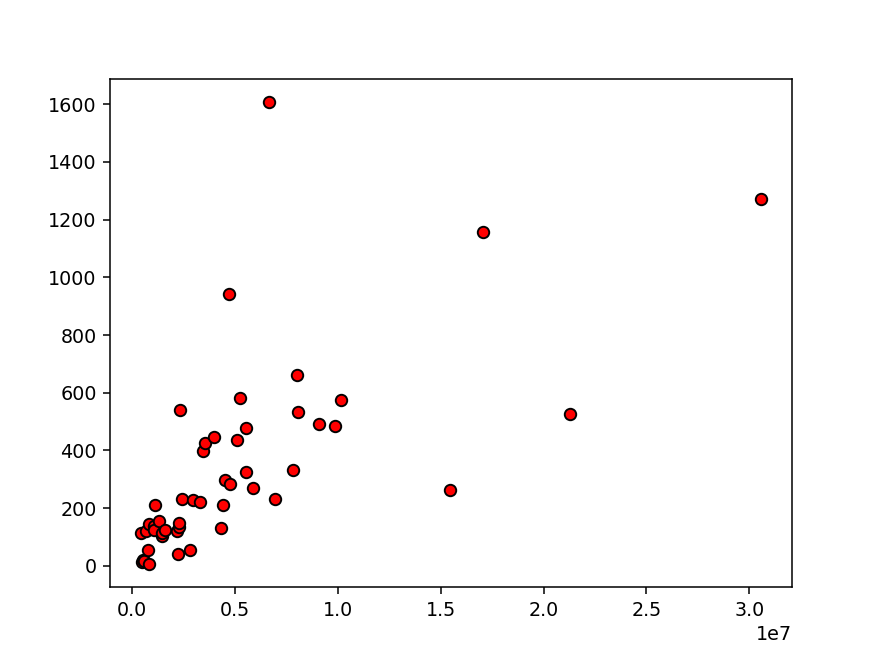

In [58]:
# Tell matplotlib to create a scatter plot based upon the above data

# Without scoop_price
plt.scatter(Popn_data, ratings, marker="o", facecolors="red", edgecolors="black")